### Resources

* A Tutorial on Principal Component Analysis [[Link](https://arxiv.org/pdf/1404.1100.pdf)][[Link](https://arxiv.org/pdf/1804.02502.pdf)]

* Backpropagation Step by Step [[Link](https://hmkcode.com/ai/backpropagation-step-by-step/)]

## **Importing all the libraries**

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import style
import pandas as pd
import seaborn as sn
import numpy  as np
from tqdm import tqdm
import os
%matplotlib inline
tf.random.set_seed(45)
np.random.seed(45)
style.use('seaborn')

## **Loading datase and Metric**

##### Loading CIFAR10 (Canadian Institute for Advanced Research) dataset

**Note**: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
Links: [[1](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10)][[2](https://www.cs.toronto.edu/~kriz/cifar.html)]

In [ ]:
N_train = 3000
N_test  = 300
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
X_train, Y_train = X_train[:N_train], Y_train[:N_train]
X_test, Y_test   = X_test[:N_test], Y_test[:N_test]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3000, 32, 32, 3) (3000, 1)
(300, 32, 32, 3) (300, 1)


#### Metric Class

In [ ]:
class Metrics:
    def __init__(self):
        pass

    def precision(self, y, y_hat, cls):
        '''
            y    : n-dim numpy array
            y_hat: n-dim numpy array
            cls  : class
        '''
        if np.sum(y_hat==cls)>0:
            return np.sum(y[y_hat==cls]==cls)/np.sum(y_hat==cls)
        else:
            return 0.0

    def recall(self, y, y_hat, cls):
        '''
            y    : n-dim numpy array
            y_hat: n-dim numpy array
            cls  : class
        '''
        if np.sum(y==cls)>0:
            return np.sum(y_hat[y==cls]==cls)/np.sum(y==cls)
        else:
            return 0.0

    def acc(self, y, y_hat):
        '''
            y    : n-dim numpy array
            y_hat: n-dim numpy array
        '''
        return np.sum(y==y_hat)/y.shape[0]

## **Welcome to ScratchWorld !!!**

<font size="3">
Story so far...<br/>
You helped our beloved Saitama in writing the kNN algorithm. Saitama submitted it to Hero Association for intelligence test. After the submission, just like us something clicked in his mind and he wants to check the performance of KNN on cifar10 dataset. Again fill all the blanks with their respective code from the previous assignment and test kNN accuracy on cifar10.<br/>
Remember you don't have luxory of using certain libraries.
</font>

* One punch man [[Link](https://onepunchman.fandom.com/wiki/One-Punch_Man_Wiki)]

#### K-Nearest Neighbor (kNN)  

In [ ]:
from scipy.stats import mode
class KNN:
    def __init__(self):
        # Leave this blank
        pass

    #Euclidean Distance
    def eucledian(self,p1,p2):
      dist = np.sqrt(np.sum((p1-p2)**2))
      return dist

    # Function that implement k-NN algorithm
    def predict(self, x_test, x_train, y_train, k=3):
        # Write your code here
        labels = []
        for i in x_test:
          distances = []
          for j in range(len(x_train)):
            dist = self.eucledian(np.array(x_train[j,:]),i)
            distances.append(dist)
          distances = np.argsort(np.array(distances))[:k]
          x = y_train[distances]
          max = mode(x)
          max = max.mode[0]
          labels.append(max)

        return np.squeeze(np.array(labels))
        pass

In [ ]:
# main method
knn     = KNN()
metric  = Metrics()

In [ ]:
# Here we are reshaping the Nx32x32x3 dimenision to Nx3072
# why reshaping? [think]
knn_x_train = np.reshape(X_train, [X_train.shape[0], -1])
knn_x_test  = np.reshape(X_test, [X_test.shape[0], -1])
print(knn_x_train.shape, knn_x_test.shape)

(3000, 3072) (300, 3072)


In [ ]:
#Y_test.shape

In [ ]:
#yyy = np.squeeze(Y_test)

In [ ]:
#yyy.shape

In [ ]:
#r = knn.predict(knn_x_test, knn_x_train, Y_train, k=3)
# for cls in np.unique(Y_test):
#   print(np.sum(r==cls))
#   print(yyy[r==cls])
#print(r.shape)

In [ ]:
knn_y_test  = knn.predict(knn_x_test, knn_x_train, Y_train, k=3)
print('Accuracy: ', metric.acc(Y_test, knn_y_test))

for cls in np.unique(Y_test):
    print('Class: ', cls)
    print('Precision: ', metric.precision(np.squeeze(Y_test), knn_y_test, cls))
    print('Recall: ', metric.recall(np.squeeze(Y_test), knn_y_test, cls))
    print()

Accuracy:  31.73
Class:  0
Precision:  0.16923076923076924
Recall:  0.6111111111111112

Class:  1
Precision:  0.1724137931034483
Recall:  0.20833333333333334

Class:  2
Precision:  0.18840579710144928
Recall:  0.48148148148148145

Class:  3
Precision:  0.15384615384615385
Recall:  0.06896551724137931

Class:  4
Precision:  0.25
Recall:  0.13043478260869565

Class:  5
Precision:  1.0
Recall:  0.03571428571428571

Class:  6
Precision:  0.42857142857142855
Recall:  0.08823529411764706

Class:  7
Precision:  0.0
Recall:  0.0

Class:  8
Precision:  0.38461538461538464
Recall:  0.2702702702702703

Class:  9
Precision:  0.3333333333333333
Recall:  0.05714285714285714



<font size="3">
Oh noooooooo...<br/>
What just happened!!!<br/>
This much less accuracy Saitama screamed!!!<br/><br/>
Hero association just contacted Saitama and they were very angry with his machine learning algorithm for ALIEN intrusion detection. Saitama's KNN algorithm by mistake detected hero association's director as ALIEN and fired missiles that killed the director. Due to this hero association rejected the application of Saitama.<br/>
Genos class S rank hero, the only disciple of Saitam, heared about all these incidents and proposes a hypothesis to Saitama "to use Principal component analysis for better feature selection and reducing the dimenssion of the data. This might increase accuracy of the KNN."<br/>
<b>Your task is to help Saitama in writing the PCA code from scratch, by using few numpy library.</b>
</font>


* One punch man (Genos) [[Link](https://onepunchman.fandom.com/wiki/Genos)]

#### Principal Component Analysis (PCA)

In [ ]:
class PCA:
    def __init__(self, x):
        self.principal_axis = None
        self.mean           = np.mean(x, axis=0)

    def train(self, x, n_components=2):
        # Step 1: 0-centered mean
        x_mean = x - self.mean
        # Write your code here

        # Step 2: Calculate covarience
        # cov(x_j, x_j') = (1/m) (x_j)^T . x_j'
        # Write your code here
        #cov = np.cov(x_mean , rowvar = False)
        cov = np.dot(x_mean.T, x_mean) / (x.shape[0])

        # Step 3: Calculae eigenvalue and eigenvector.
        # For this you can use np.linalg.eigh(), preffered over .eig()
        # Write your code here
        eigen_val , eigen_vect = np.linalg.eigh(cov)


        # Step 4: Sort the eigenvalues in descending order, place eigenvector according to it.
        # Write your code here
        sort_index = np.argsort(eigen_val)[::-1]
        sort_val = eigen_val[sort_index]
        sort_vect = eigen_vect[:,sort_index]

        # Step 5: Select the number of principal components for data reduction
        # Write your code here
        vect_subset = sort_vect[:,0:n_components]
        self.principal_axis = vect_subset # set the pricipal components

    def transform(self, x):
        x = x - self.mean

        # Step 6: Project the data onto principal components
        # Write your code here
        projected_data = np.dot(x, self.principal_axis) # set the projected data

        return projected_data

In [ ]:
# Here we are reshaping the Nx32x32x3 dimenision to Nx3072
# why reshaping? [think]
pca_x_train = np.reshape(X_train, [X_train.shape[0], -1])
pca_x_test  = np.reshape(X_test, [X_test.shape[0], -1])

In [ ]:
# Creating object of PCA and training the PCA for better component selection
pca = PCA(pca_x_train)
pca.train(pca_x_train, n_components=10)

In [ ]:
# Here we have to transform the train and test data
pca_x_train_pc = pca.transform(pca_x_train) # fill this
pca_x_test_pc  = pca.transform(pca_x_test) # fill this

In [ ]:
# Here we are using KNN method on the projected feature of CIFAR10 using PCA
pca_y_test  = knn.predict(pca_x_test_pc, pca_x_train_pc, Y_train, k=3)

print('Accuracy: ', metric.acc(Y_test, pca_y_test))

for cls in np.unique(Y_test):
    print('Class: ', cls)
    print('Precision: ', metric.precision(np.squeeze(Y_test), pca_y_test, cls))
    print('Recall: ', metric.recall(np.squeeze(Y_test), pca_y_test, cls))
    print()

Accuracy:  30.15
Class:  0
Precision:  0.21818181818181817
Recall:  0.3333333333333333

Class:  1
Precision:  0.08333333333333333
Recall:  0.125

Class:  2
Precision:  0.15625
Recall:  0.37037037037037035

Class:  3
Precision:  0.2
Recall:  0.13793103448275862

Class:  4
Precision:  0.13333333333333333
Recall:  0.17391304347826086

Class:  5
Precision:  0.3076923076923077
Recall:  0.14285714285714285

Class:  6
Precision:  0.3333333333333333
Recall:  0.20588235294117646

Class:  7
Precision:  0.25
Recall:  0.07407407407407407

Class:  8
Precision:  0.3333333333333333
Recall:  0.24324324324324326

Class:  9
Precision:  0.3076923076923077
Recall:  0.22857142857142856



<font size="3">
What a drag....<br/>
Woooo what just happened!!!<br/><br/>
</font>

<font size="3">Q. Did PCA improves the classification accuracy? Based on your answer give explanation and What benifits you can observe in using PCA?</font>
<pre>
The accuracy using PCA came out to be 30.15% and without it, it was 31.73%.  
This shows that PCA did not improve the classification accuracy but instead there was a minor decrease in accuracy.

This is because, PCA reduces the dimensionality by transforming the initial set of features into a smaller set of features.
While doing this it does not give importance to the target but to the features with higher variance.
This results in loss of information as some of the important features might get lost or have a lesser effect on prediction than required.
Thus, PCA was not helpful to improve the accuracy here.
</pre>

## **Welcome to NeuralScratchWorld !!!** 📊

<font size="3">
After going through lots of trouble, Saitama and Genos went to Dr. Kuseno, the most intelligent person living on the planet. By the time Saitama and Genos reached to the lab of Dr. Kuseno, his experiment related to Space-Time got messed up and many inter-dimensional portals open all over the world.
</font><br/><br/>

<font size="3">
One portal somehow open underneath of Saitama and he fell into the world of Titans. Someone in the titan world scream use the "fully connected neural networks............"
</font><br/><br/>

**Story to be continued, going to be more fun in future....**
<br/><br/>

<font size="3">
Your task is to complete the following neural network class which Saitama has created and left all the important code as blank. Use the neural network architecture given in the diagram below. Input to the network is Nx2, output is real value. Your task is to solve regression problem using this simple neural network. Here for simplicity we have not considered bias term in the network. For backpropogation you can read more details from the article mentioned in the beginning of colab file.
</font><br/><br/>

<font size="3">
Note: As we are only using single hidden layer with 3 neurons, the approximation of complex data may not highly accurate. You can change the hyperparameters for fine tuning the network.
</font><br/><br/>

* One punch man (Dr. Kuseno) [[Link](https://onepunchman.fandom.com/wiki/Dr._Kuseno)]
* Attack on titan [[Link](https://attackontitan.fandom.com/wiki/Attack_on_Titan_Wiki)]

<img src='https://www.linkpicture.com/q/question.jpg' type='image'>

#### Network

In [ ]:
class NeuralNet:
    def __init__(self, input_feat_size):
        self.W_1 = np.random.normal(size=(input_feat_size, 3))
        self.W_2 = np.random.normal(size=(3, 1))
        self.mem = {} # For bookkeeping old values of X and W

    def forward_pass(self, X):
        # Write your code here
        X_1 = self.sigmoid(X.dot(self.W_1))
        X_2 = (X_1.dot(self.W_2))
        self.mem = {"X_1": X_1,"X_2": X_2}
        return X_2

    def backward_pass_mse(self, X, Y, Y_hat, lr=1e-4):
        # Write your code here
        s = X.shape[0]
        # error in output layer
        err_2 =(Y_hat-Y)
        err_1 = np.multiply(np.dot(err_2, self.W_2.T),(np.multiply(self.mem['X_1'], 1-(self.mem['X_1']))))
        # Gradient for w1 and w2
        w2_adj = (1./s)*(self.mem['X_1'].transpose().dot(err_2))
        w1_adj = (1./s)*(X.transpose().dot(err_1))
        # Updating parameters
        self.W_1 = self.W_1-(lr*(w1_adj))
        self.W_2 = self.W_2-(lr*(w2_adj))


        # This loop is given just for the help in gradient updates
        #for idx, data in enumerate(X):
         #   pass


    def sigmoid(self, X):
        # Write your code here
        return(1/(1 + np.exp(-X)))
        pass

    def loss(self, Y, Y_hat):
        # Write your code here
        # We are using MSE errror
        z =(np.square(Y_hat-Y))
        return z.mean()
        pass

    def metric(self, Y, Y_hat):
        # Write your code here
        # Root Mean Square Error
        rms = np.sqrt(np.square(Y_hat-Y).mean())
        return rms
        pass

#### Approximating: **Helix Function**

Sample result of approximation for helix function using above mentioned neural network<br/>
<img src='https://www.linkpicture.com/q/helix.png' type='image'>

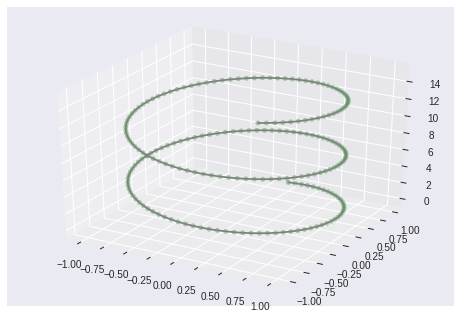

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
N  = 200
zline = np.linspace(0, 15, N)
xline = np.sin(zline)
yline = np.cos(zline)
ax    = plt.axes(projection='3d')
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(xline, yline, zline, c='g', alpha=0.3)
X     = np.array([xline, yline]).T
Y     = np.expand_dims(np.array(zline), axis=1)

In [ ]:
network   = NeuralNet(input_feat_size=2)
iteration = 3000
plot_freq = iteration/10

RMSE: 8.757693615136663:   0%|          | 0/3000 [00:00<?, ?it/s]

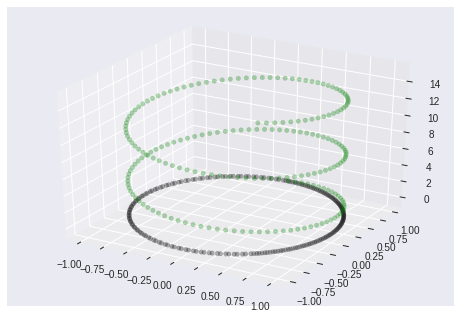

RMSE: 4.339305865179277:   8%|▊         | 253/3000 [00:00<00:05, 476.67it/s]

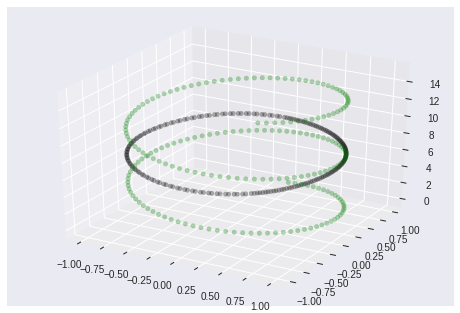

RMSE: 4.331210276032962:  19%|█▉        | 569/3000 [00:01<00:05, 444.82it/s]

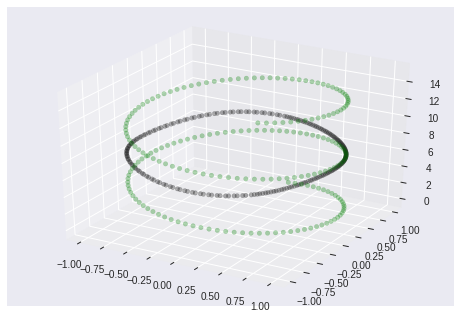

RMSE: 4.3270962120609155:  29%|██▉       | 877/3000 [00:02<00:04, 447.71it/s]

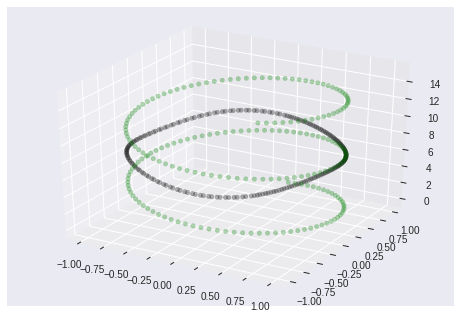

RMSE: 4.32533921927592:  39%|███▉      | 1163/3000 [00:03<00:04, 442.90it/s] 

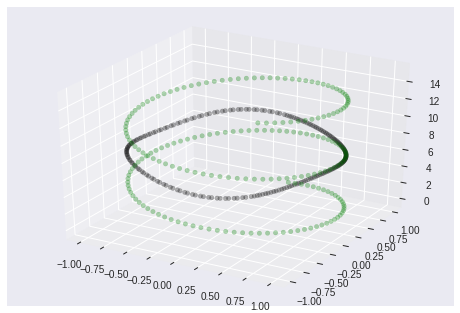

RMSE: 4.3239183649718695:  47%|████▋     | 1412/3000 [00:04<00:05, 294.88it/s]

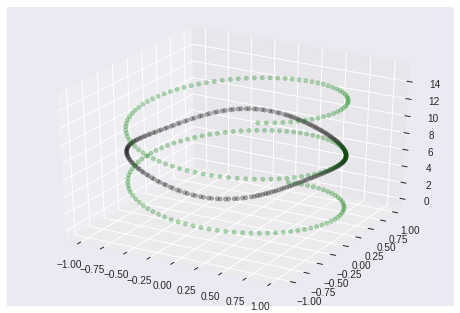

RMSE: 4.322487883591049:  58%|█████▊    | 1755/3000 [00:05<00:02, 481.71it/s]

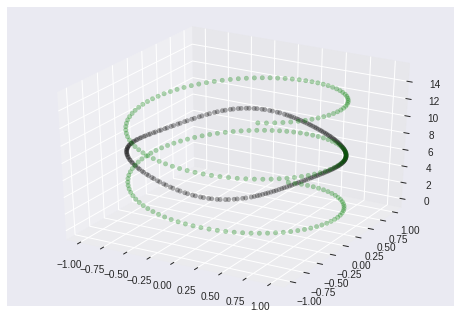

RMSE: 4.321055214906176:  68%|██████▊   | 2051/3000 [00:06<00:02, 439.39it/s]

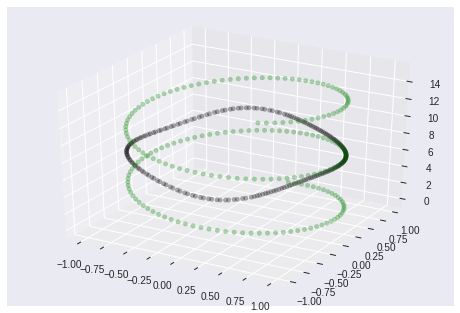

RMSE: 4.319671246860115:  78%|███████▊  | 2344/3000 [00:07<00:01, 420.23it/s]

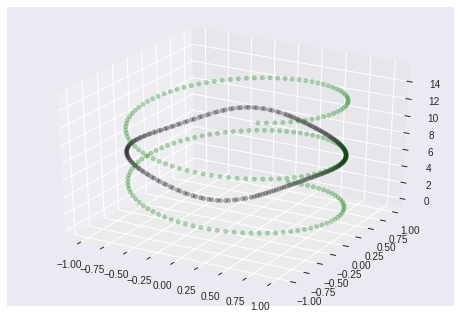

RMSE: 4.3183837899631525:  89%|████████▉ | 2667/3000 [00:08<00:00, 458.95it/s]

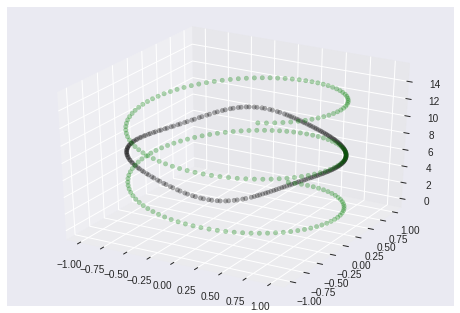

RMSE: 4.3172281865256235: 100%|██████████| 3000/3000 [00:09<00:00, 308.51it/s]


In [ ]:
tq = tqdm(range(iteration))
for itr in tq:
    Y_hat = network.forward_pass(X)
    network.backward_pass_mse(X, Y, Y_hat, lr=1e-1)
    tq.set_description('RMSE: {}'.format(network.metric(Y, Y_hat)))
    if itr%plot_freq==0:
        ax    = plt.axes(projection='3d')
        ax.scatter3D(X[:, 0], X[:, 1], Y[:, 0], c='g', alpha=0.3)
        ax.scatter3D(X[:, 0], X[:, 1], Y_hat[:, 0], c='k', alpha=0.3)
        plt.show()

#### Approximating: **Line Function**

Sample result of approximation for line function using above mentioned neural network<br/>
<img src='https://www.linkpicture.com/q/line_1.png' type='image'>

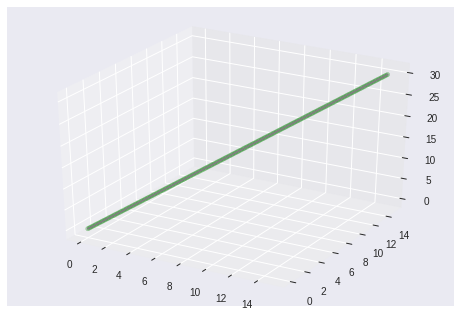

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
N  = 200
xline = np.linspace(0, 15, N)
yline = np.linspace(0, 15, N)
zline = xline + yline
ax    = plt.axes(projection='3d')
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(xline, yline, zline, c='g', alpha=0.3)
# plt.show()
X     = np.array([xline, yline]).T
Y     = np.expand_dims(np.array(zline), axis=1)

In [ ]:
network   = NeuralNet(input_feat_size=2)
iteration = 3000
plot_freq = iteration/10

RMSE: 18.221121873426455:   0%|          | 0/3000 [00:00<?, ?it/s]

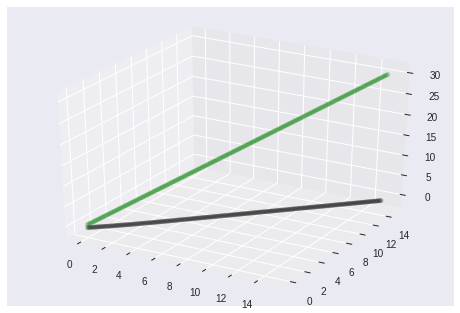

RMSE: 14.713778563816831:   8%|▊         | 234/3000 [00:00<00:04, 569.08it/s]

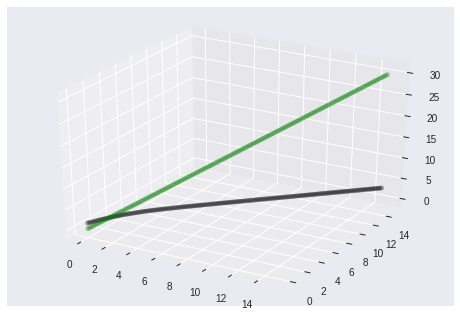

RMSE: 12.234959469949056:  19%|█▉        | 569/3000 [00:01<00:04, 538.95it/s]

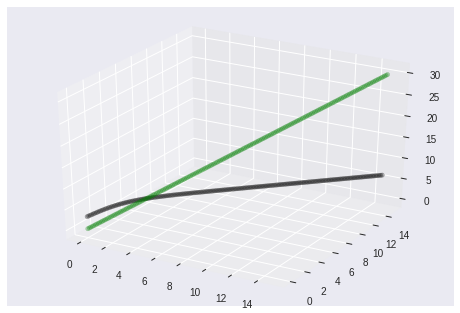

RMSE: 10.509705285378168:  30%|██▉       | 889/3000 [00:02<00:04, 456.84it/s]

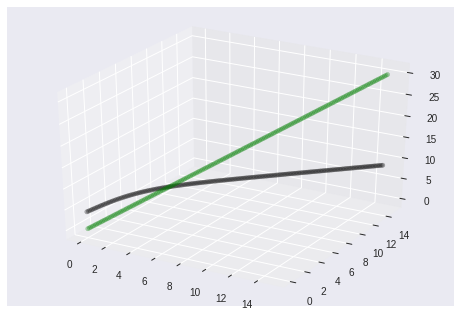

RMSE: 9.273561429079626:  38%|███▊      | 1153/3000 [00:03<00:04, 382.34it/s]

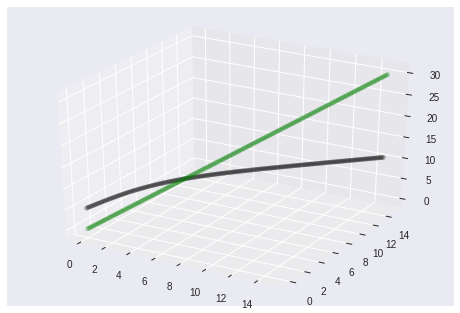

RMSE: 8.39200346670685:  48%|████▊     | 1436/3000 [00:04<00:04, 335.04it/s] 

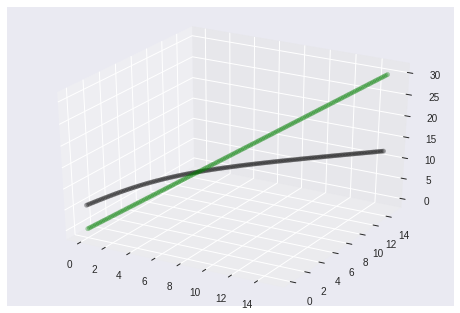

RMSE: 7.757095798159721:  59%|█████▊    | 1757/3000 [00:05<00:02, 505.59it/s]

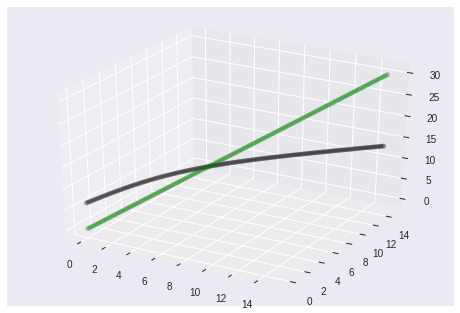

RMSE: 7.292282989672661:  70%|██████▉   | 2085/3000 [00:06<00:01, 468.38it/s]

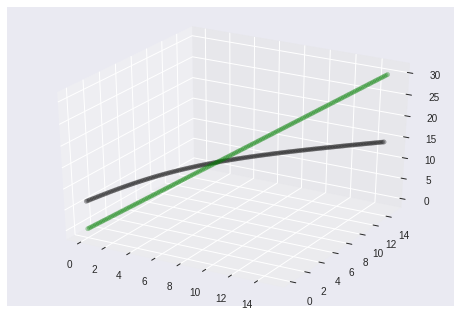

RMSE: 6.948477667935885:  80%|███████▉  | 2387/3000 [00:07<00:01, 482.73it/s]

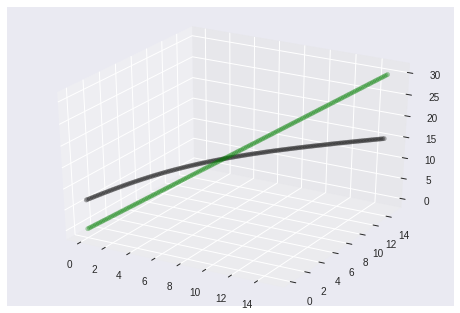

RMSE: 6.6890325659433465:  88%|████████▊ | 2643/3000 [00:08<00:00, 407.09it/s]

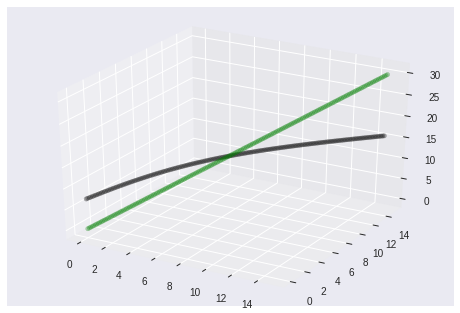

RMSE: 6.4890788441046094: 100%|██████████| 3000/3000 [00:09<00:00, 316.62it/s]


In [ ]:
tq = tqdm(range(iteration))
for itr in tq:
    Y_hat = network.forward_pass(X)
    network.backward_pass_mse(X, Y, Y_hat, lr=1e-3)
    tq.set_description('RMSE: {}'.format(network.metric(Y, Y_hat)))
    if itr%plot_freq==0:
        ax    = plt.axes(projection='3d')
        ax.scatter3D(X[:, 0], X[:, 1], Y[:, 0], c='g', alpha=0.3)
        ax.scatter3D(X[:, 0], X[:, 1], Y_hat[:, 0], c='k', alpha=0.3)
        plt.show()

#### Approximating: **Sin Cos Function**

Sample result of approximation for Sin Cos function using above mentioned neural network<br/>
<img src='https://www.linkpicture.com/q/sincos.png' type='image'>

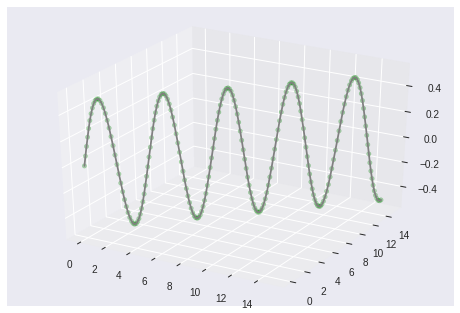

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
N  = 200
xline = np.linspace(0, 15, N)
yline = np.linspace(0, 15, N)
zline = np.sin(xline) * np.cos(yline)
ax    = plt.axes(projection='3d')
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(xline, yline, zline, c='g', alpha=0.3)
# plt.show()
X     = np.array([xline, yline]).T
Y     = np.expand_dims(np.array(zline), axis=1)

In [ ]:
network   = NeuralNet(input_feat_size=2)
iteration = 3000
plot_freq = iteration/10

RMSE: 0.3930487757672675:   0%|          | 0/3000 [00:00<?, ?it/s]

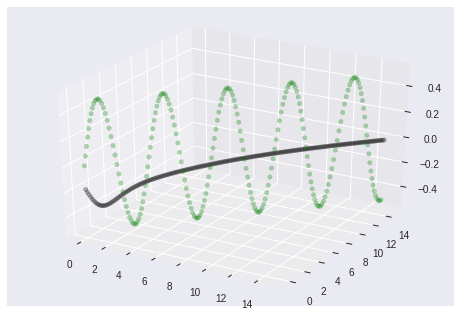

RMSE: 0.3907849561919235:   8%|▊         | 251/3000 [00:00<00:04, 602.72it/s] 

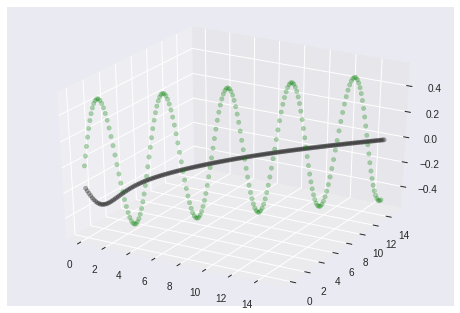

RMSE: 0.38877266086300205:  18%|█▊        | 554/3000 [00:02<00:08, 294.93it/s]

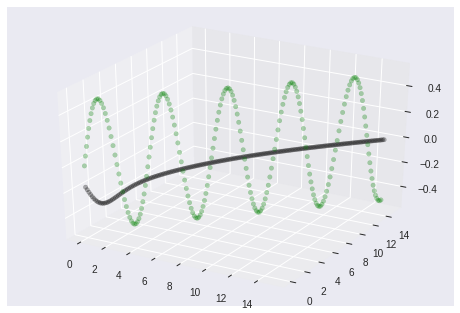

RMSE: 0.3869558160672248:  29%|██▉       | 870/3000 [00:02<00:04, 497.37it/s]

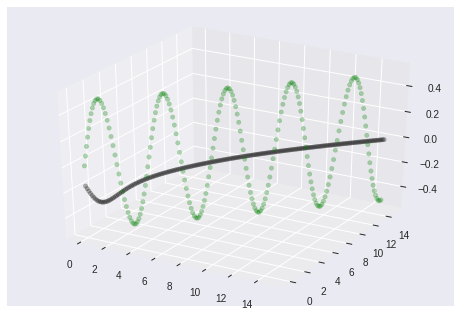

RMSE: 0.3852961089067147:  39%|███▉      | 1177/3000 [00:03<00:03, 458.24it/s]

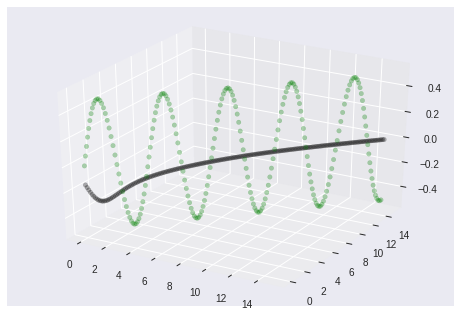

RMSE: 0.3837661548973746:  48%|████▊     | 1429/3000 [00:04<00:03, 428.48it/s]

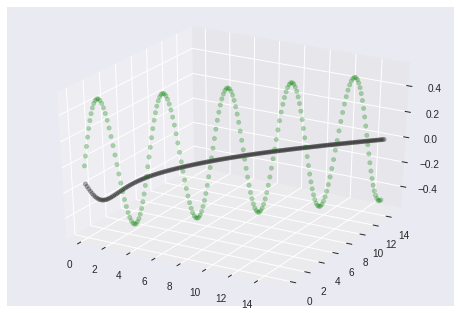

RMSE: 0.3823456581059896:  59%|█████▉    | 1769/3000 [00:05<00:03, 322.92it/s]

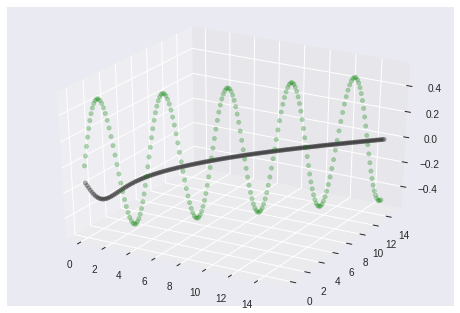

RMSE: 0.3810191217272391:  69%|██████▉   | 2077/3000 [00:07<00:02, 418.91it/s]

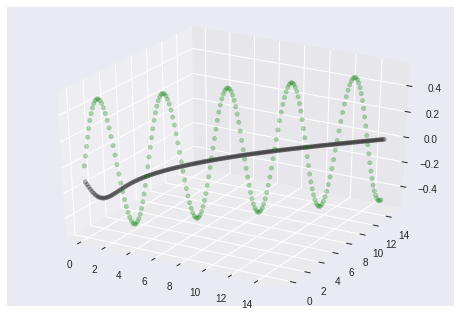

RMSE: 0.379774415468664:  79%|███████▉  | 2372/3000 [00:07<00:01, 491.43it/s] 

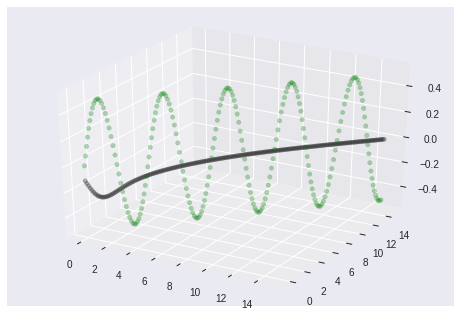

RMSE: 0.37860184222990073:  89%|████████▉ | 2672/3000 [00:09<00:01, 316.69it/s]

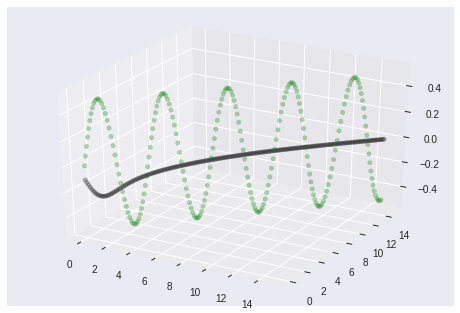

RMSE: 0.3774971042359851: 100%|██████████| 3000/3000 [00:10<00:00, 294.24it/s]


In [ ]:
tq = tqdm(range(iteration))
for itr in tq:
    Y_hat = network.forward_pass(X)
    network.backward_pass_mse(X, Y, Y_hat, lr=1e-3)
    tq.set_description('RMSE: {}'.format(network.metric(Y, Y_hat)))
    if itr%plot_freq==0:
        ax    = plt.axes(projection='3d')
        ax.scatter3D(X[:, 0], X[:, 1], Y[:, 0], c='g', alpha=0.3)
        ax.scatter3D(X[:, 0], X[:, 1], Y_hat[:, 0], c='k', alpha=0.3)
        plt.show()

#### Approximating: **PCA + NN**

Sample result of approximation for PCA + NN using above mentioned neural network<br/>
<img src='https://www.linkpicture.com/q/pca.png' type='image'>

Here, n_components is set to 2.

##### Loading CIFAR-10 dataset

In [ ]:
# Here we are loading the dataset
N_train = 1000
(X_train, Y_train), (_, _) = tf.keras.datasets.cifar10.load_data()
X_train, Y_train = X_train[:N_train], Y_train[:N_train]
print(X_train.shape, Y_train.shape)

(1000, 32, 32, 3) (1000, 1)


In [ ]:
# Write your code here
# Don't forget to reshape the data
# Use n_components=2 for feature reduction
# Here we have to use only train dataset

X_train_pc = np.reshape(X_train, [X_train.shape[0], -1])
pca = PCA(X_train_pc)
pca.train(X_train_pc, n_components=2)
X_train_pc = pca.transform(X_train_pc)
X       = X_train_pc
print(X.shape)

(1000, 2)


In [ ]:
network   = NeuralNet(input_feat_size=2)
iteration = 3000
plot_freq = iteration/10

RMSE: 4.512299658139628:   0%|          | 0/3000 [00:00<?, ?it/s]

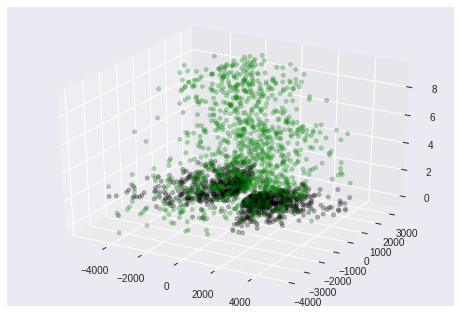

RMSE: 4.071619627465868:   8%|▊         | 255/3000 [00:00<00:05, 503.01it/s]

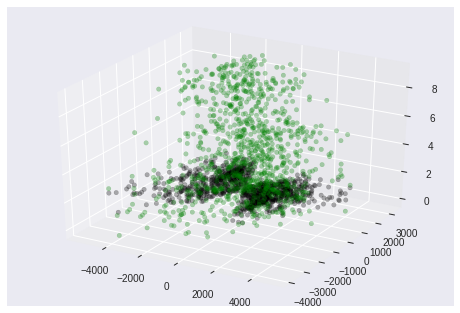

RMSE: 3.7950901632019396:  19%|█▉        | 567/3000 [00:02<00:07, 345.98it/s]

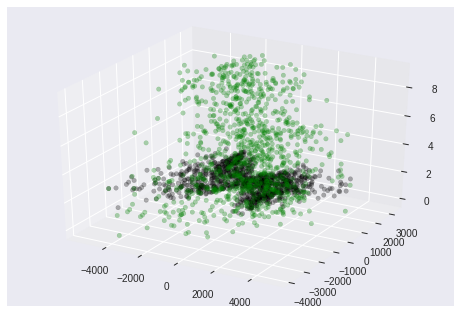

RMSE: 3.6281756681736264:  30%|██▉       | 898/3000 [00:03<00:04, 456.84it/s]

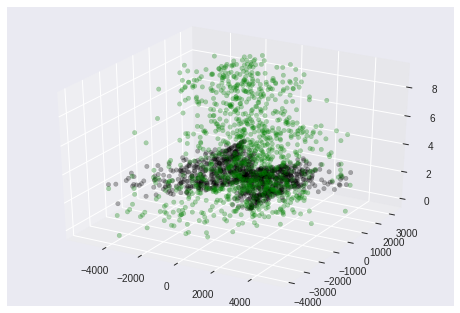

RMSE: 3.524710190004394:  40%|███▉      | 1188/3000 [00:04<00:04, 420.90it/s] 

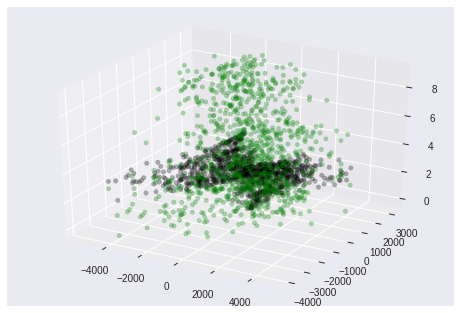

RMSE: 3.4602668616673196:  49%|████▉     | 1465/3000 [00:04<00:03, 466.16it/s]

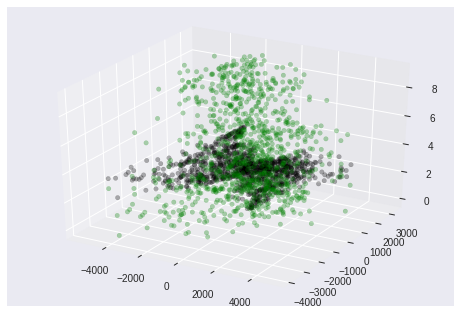

RMSE: 3.4189707852545403:  58%|█████▊    | 1733/3000 [00:05<00:02, 437.07it/s]

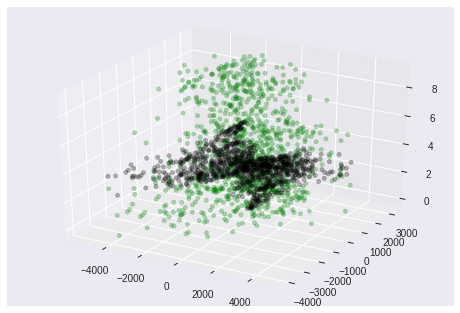

RMSE: 3.391670820514417:  68%|██████▊   | 2041/3000 [00:06<00:02, 438.01it/s]

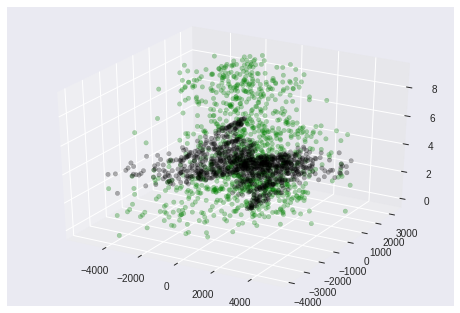

RMSE: 3.3730074678947504:  79%|███████▉  | 2369/3000 [00:07<00:01, 460.96it/s]

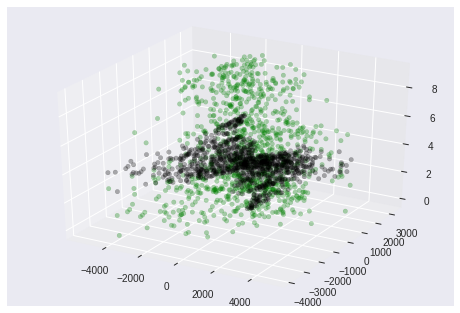

RMSE: 3.3598097251438497:  88%|████████▊ | 2637/3000 [00:08<00:00, 392.55it/s]

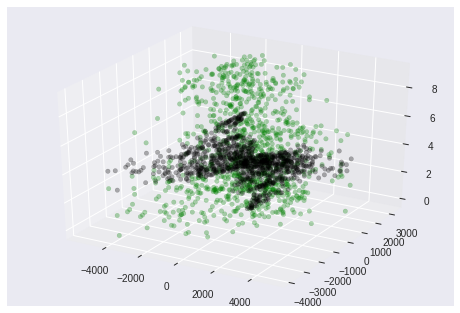

RMSE: 3.350198203393795: 100%|██████████| 3000/3000 [00:09<00:00, 308.75it/s]


In [ ]:
tq = tqdm(range(iteration))
for itr in tq:
    Y_hat = network.forward_pass(X)
    network.backward_pass_mse(X, Y_train, Y_hat, lr=1e-3)
    tq.set_description('RMSE: {}'.format(network.metric(Y_train, Y_hat)))
    if itr%plot_freq==0:
        ax    = plt.axes(projection='3d')
        ax.scatter3D(X[:, 0], X[:, 1], Y_train[:, 0], c='g', alpha=0.3)
        ax.scatter3D(X[:, 0], X[:, 1], Y_hat[:, 0], c='k', alpha=0.3)
        plt.show()

<font size="3">You have to run the above code and write your observations here for all the 4 functions.</font>
<pre>
From the above 4 functions we can see that as iterations of the neural network progresses, there is a decrease in the network metric which is RMSE here.
Also, the neural network approaches the required model accurately.
Above, we have considered all types of possible functions i.e. helix, line, sin-cos functions and neural network successfully approximates all the functions.
Hence, we can say that Neural networks are highly effective.
Moreover, applying Neural network along with PCA on CIFAR-10 dataset has helped us to to improve the classification and has reduced the error to a large extent.
The RMSE of the model can be seen to very low after using Neural Network and PCA together.
</pre>